## Loan Prediction Dataset

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
loanDf=pd.read_csv("F:/courses/UseCases/24 UseCase/Loan Prediction Dataset/train_u6lujuX_CVtuZ9i.csv")
loanDf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EDA

In [10]:
loanDf.shape

(614, 13)

In [8]:
loanDf['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [11]:
loanDf['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

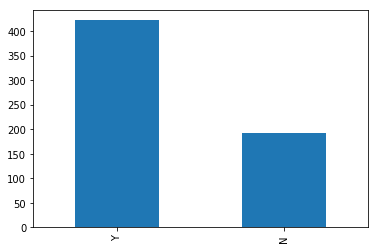

In [235]:
%matplotlib inline
loanDf['Loan_Status'].value_counts().plot('bar')

In [21]:
loanDf.groupby('Loan_Status').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,151.220994,344.064516,0.541899
Y,5384.068720,1504.516398,144.294404,341.072464,0.981818


In [22]:
loanDf['Credit_History'].unique()

array([ 1.,  0., nan])

In [30]:
pd.crosstab(loanDf.Loan_Status,loanDf.Credit_History, normalize=True)

Credit_History,0.0,1.0
Loan_Status,,
N,0.145390,0.171986
Y,0.012411,0.670213


## 67 % of customers take loan and have credit history

In [34]:
pd.crosstab(loanDf.Loan_Status,loanDf.Credit_History, normalize='columns')

Credit_History,0.0,1.0
Loan_Status,,
N,0.921348,0.204211
Y,0.078652,0.795789


### 80 % of customers that have credit history take loan, Significant*

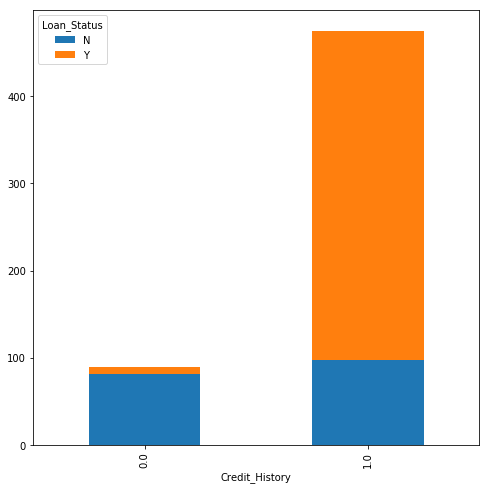

In [35]:
pd.crosstab(index=loanDf["Credit_History"], columns=loanDf["Loan_Status"]).plot(kind="bar",figsize=(8,8),stacked=True)

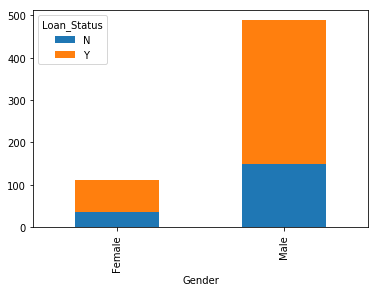

In [40]:
pd.crosstab(loanDf.Gender,loanDf.Loan_Status).plot(kind='bar',stacked=True)

In [131]:
pd.crosstab(loanDf.Gender,loanDf.Loan_Status,normalize='index')

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


In [233]:
loanDf['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

### about 80 % of customers are male , males and females have slight chances rate to take a loan 

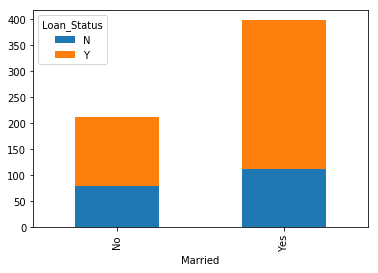

In [42]:
pd.crosstab(loanDf.Married,loanDf.Loan_Status).plot(kind='bar',stacked=True)i

In [134]:
pd.crosstab(loanDf.Married,loanDf.Loan_Status,normalize='index')

Loan_Status,N,Y
Married,,
No,0.370892,0.629108
Yes,0.283920,0.716080


### 50 % of customer are Married , also to be married ,you have 10 % more chance to take loan. significant 

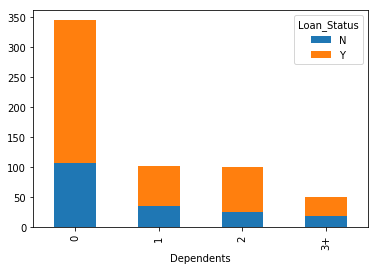

In [48]:
pd.crosstab(loanDf.Dependents,loanDf.Loan_Status).plot(kind='bar',stacked=True)

In [135]:
pd.crosstab(loanDf.Dependents,loanDf.Loan_Status,normalize='index')

Loan_Status,N,Y
Dependents,,
0,0.310145,0.689855
1,0.352941,0.647059
2,0.247525,0.752475
3+,0.352941,0.647059


### Bank does not give any speacial consideration(1 or 3+)dependents ,but does with other (0 or 2)
### good  significance  -_-, may be it's related to customer job or age.

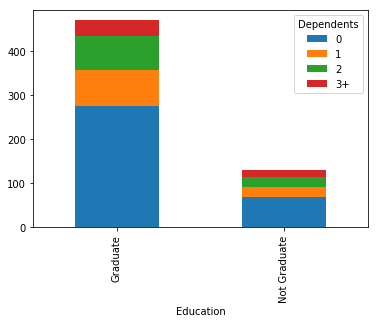

In [236]:
pd.crosstab(loanDf.Education,loanDf.Dependents).plot(kind='bar',stacked=True)

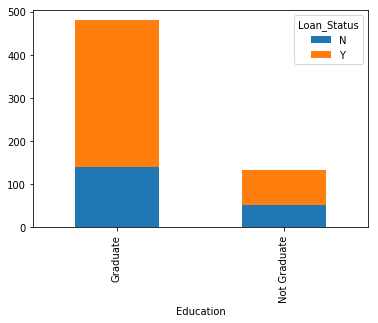

In [50]:
pd.crosstab(loanDf.Education,loanDf.Loan_Status).plot(kind='bar',stacked=True)

In [136]:
pd.crosstab(loanDf.Education,loanDf.Loan_Status,normalize='index')

Loan_Status,N,Y
Education,,
Graduate,0.291667,0.708333
Not Graduate,0.388060,0.611940


#### if client is graduate ,it has 10 % more than not gratudate to take loan , so it's significant

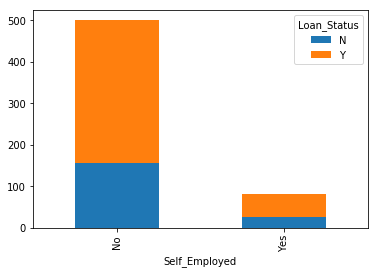

In [51]:
pd.crosstab(loanDf.Self_Employed,loanDf.Loan_Status).plot(kind='bar',stacked=True)

In [138]:
pd.crosstab(loanDf.Self_Employed,loanDf.Loan_Status,normalize='index')

Loan_Status,N,Y
Self_Employed,,
No,0.314000,0.686000
Yes,0.317073,0.682927


#### Same chance to take loan for employed or not , NOT significant :(

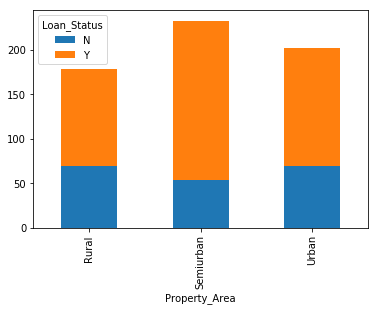

In [52]:
pd.crosstab(loanDf.Property_Area,loanDf.Loan_Status).plot(kind='bar',stacked=True)

In [58]:
pd.crosstab(loanDf.Loan_Status,loanDf.Property_Area,normalize='columns')

Property_Area,Rural,Semiurban,Urban
Loan_Status,,,
N,0.385475,0.23176,0.341584
Y,0.614525,0.76824,0.658416


### different Areas have slight changes on loan , it might be significant.

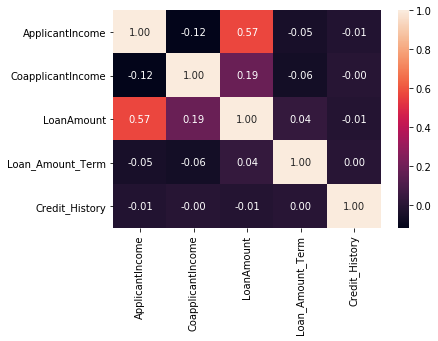

In [64]:
sns.heatmap(loanDf.corr(), annot=True, fmt=".2f")
plt.show()


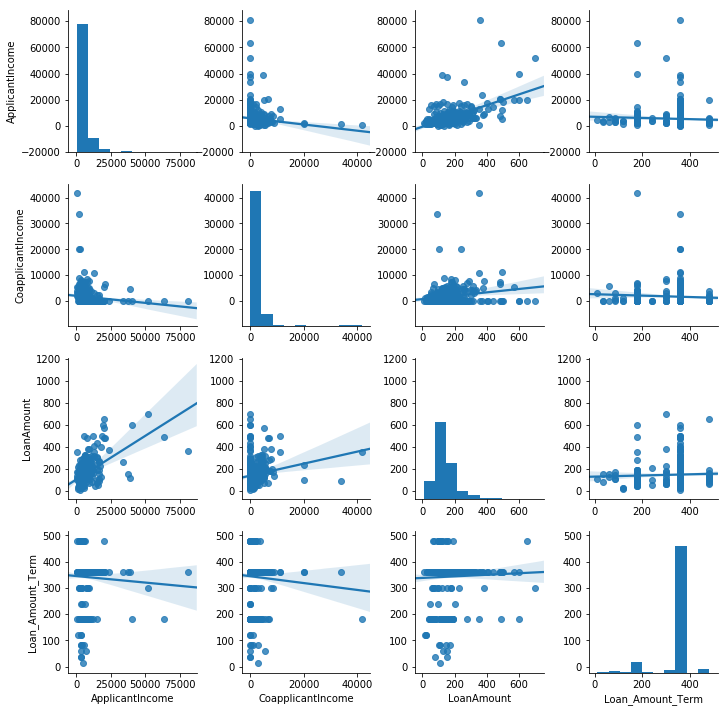

In [82]:
sns.pairplot(loanDf[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].dropna(),kind="reg")

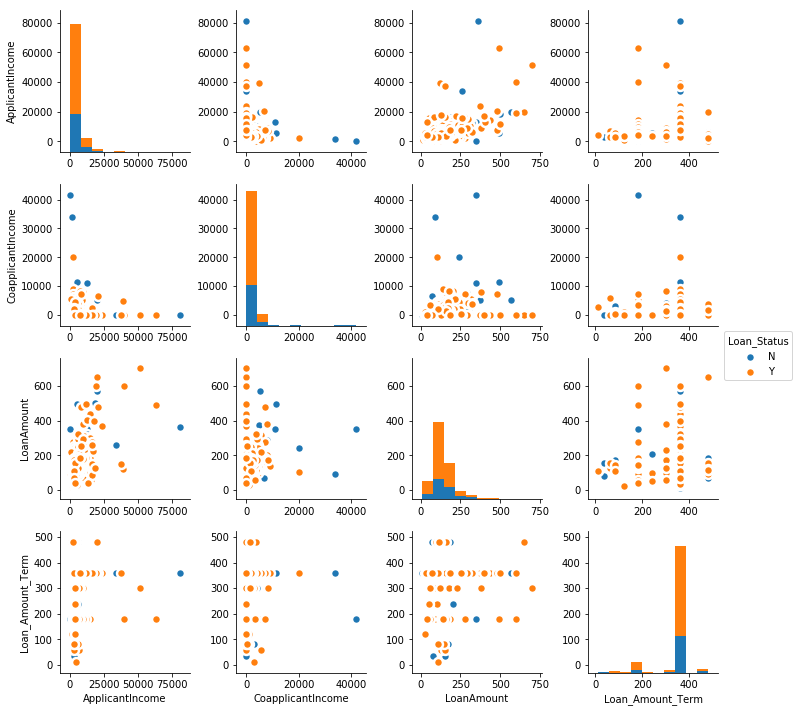

In [86]:
sns.pairplot(loanDf[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Loan_Status']].dropna(), kind="scatter", hue="Loan_Status", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

#### 1- Applicant income and coapplicant income looks have some similarities, so we could add both together as total income
#### 2- we could figure out classification boundries between variables, as ex: loan(Y):income >0 and <=2500 ,also loan amount >0 and #### <450
#### 3- ^_^ !? all numarical variables histograms(alone) do not show any groups separations between loan status(y,n)        

C:\Users\Essam\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


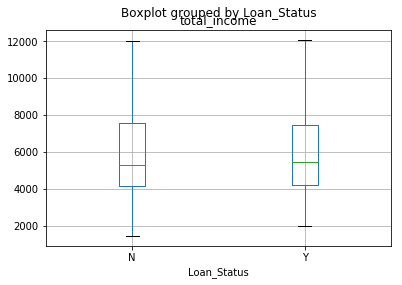

In [190]:
loanDf.boxplot(column='total_income', by='Loan_Status',showfliers=False)

In [191]:
loanDf.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'total_income'],
      dtype='object')

C:\Users\Essam\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


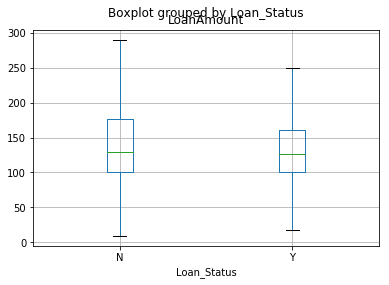

In [193]:
loanDf.boxplot(column='LoanAmount', by='Loan_Status',showfliers=False)

C:\Users\Essam\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


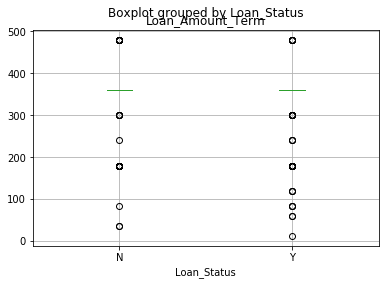

In [195]:
loanDf.boxplot(column='Loan_Amount_Term', by='Loan_Status')

In [ ]:
loanDf.boxplot(column='total_income', by='Loan_Status',showfliers=False)

# Modeling

### Recursive Feature Elimination

#### Triel A: Logistic Regression, 'Simplicity First ^_^'
#### Dummy Vaiables

In [21]:
data=loanDf
cat_vars=['Dependents','Gender','Married','Education','Self_Employed','Property_Area','Credit_History']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg,5)

data=data[to_keep].dropna()
data_X=data.drop(['Loan_Status','Loan_ID'],axis=1)
data_y=data['Loan_Status']

In [24]:
data_X.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Credit_History_0.0         0
Credit_History_1.0         0
dtype: int64

In [114]:
data_X.columns
'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Dependents_0','Dependents_3+','Dependents_2', 'Gender_Female', 'Gender_Male', 'Married_No','Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes','Property_Area_Urban'

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Credit_History_0.0',
       'Credit_History_1.0'],
      dtype='object')

In [113]:
rfe = rfe.fit(data_X, data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False  True False False False False False  True
 False False False False False  True False  True  True]
[17 16 14 15  9  1  3  8  7  6  5  1  4 12 10 13  2  1 11  1  1]


### Logistc Regression Iter(1)

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Essam\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [117]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [120]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred)) 

[[ 27  23]
 [  6 118]]
             precision    recall  f1-score   support

          N       0.82      0.54      0.65        50
          Y       0.84      0.95      0.89       124

avg / total       0.83      0.83      0.82       174



### Regression Iteration 2

In [145]:
data_X2=data_X.drop(['Self_Employed_No','Self_Employed_Yes','Gender_Female','Gender_Male'],axis=1)

In [149]:
data_X2.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Credit_History_0.0',
       'Credit_History_1.0'],
      dtype='object')

In [150]:
X_train, X_test, y_train, y_test = train_test_split(data_X2, data_y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [152]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred)) 

[[ 28  22]
 [  7 117]]
             precision    recall  f1-score   support

          N       0.80      0.56      0.66        50
          Y       0.84      0.94      0.89       124

avg / total       0.83      0.83      0.82       174



#### it looks no change :(
#### so we forget to deal with corr variables(income,loan amount)

In [154]:
data_X2['total_income']=data_X2['ApplicantIncome']+data_X2['CoapplicantIncome']

In [165]:
loanDf.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'total_income'],
      dtype='object')

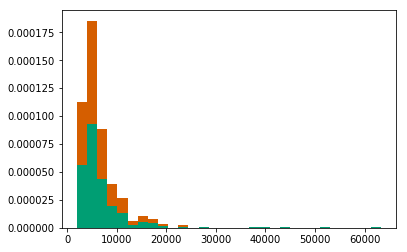

In [174]:
loanDf['total_income']=loanDf['ApplicantIncome']+loanDf['CoapplicantIncome']
take_loan=list(loanDf[loanDf['Loan_Status']=='Y']['total_income'])
not_take_loan=list(loanDf[loanDf['Loan_Status']=='Y']['total_income'])
colors = ['#009E73', '#D55E00']
plt.hist([take_loan,not_take_loan], 30,stacked=True,color=colors,normed=True)
plt.legend()

#### No grops on loan status on total income

In [179]:
X_train, X_test, y_train, y_test = train_test_split(data_X2.drop(['ApplicantIncome','CoapplicantIncome'],axis=1), data_y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


In [181]:
data_X2.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Credit_History_0.0',
       'Credit_History_1.0', 'total_income'],
      dtype='object')

In [180]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred)) 

[[ 28  22]
 [  6 118]]
             precision    recall  f1-score   support

          N       0.82      0.56      0.67        50
          Y       0.84      0.95      0.89       124

avg / total       0.84      0.84      0.83       174



### Feature Selection

#### Chi-Squared

In [11]:
data_X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Credit_History_0.0',
       'Credit_History_1.0'],
      dtype='object')

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(data_X,data_y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

[1.32185e+02 1.55095e+04 5.13178e+01 6.49125e+00 9.24868e-03 1.04757e+00
 2.15132e+00 2.15349e-02 3.77546e-01 1.62708e-01 3.47545e+00 1.68169e+00
 5.62274e-01 2.12363e+00 3.66680e-03 1.75055e-01 4.61559e+00 5.47284e+00
 2.78779e-01 1.38624e+02 2.15503e+01]


In [36]:
testchi=data_X.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Dependents_0','Dependents_3+','Dependents_2', 'Gender_Female', 'Gender_Male', 'Married_No','Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes','Property_Area_Urban'],axis=1)

In [40]:
testchi.columns

Index(['Dependents_1', 'Married_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Credit_History_0.0', 'Credit_History_1.0'],
      dtype='object')

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(testchi, data_y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


In [39]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred)) 

[[ 28  22]
 [  5 119]]
             precision    recall  f1-score   support

          N       0.85      0.56      0.67        50
          Y       0.84      0.96      0.90       124

avg / total       0.85      0.84      0.83       174



### So we get our best by ch square and RFE
### it's time for Decsion Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier  
X_train, X_test, y_train, y_test = train_test_split(testchi, data_y, test_size=0.3, random_state=0)
Dtree = DecisionTreeClassifier(criterion = 'entropy').fit(X_train,y_train)

In [58]:
y_pred = Dtree.predict(X_test)

In [59]:
print("The prediction accuracy is: ",Dtree.score(X_test,y_test)*100,"%")

The prediction accuracy is:  83.33333333333334 %


In [60]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[ 27  23]
 [  6 118]]
             precision    recall  f1-score   support

          N       0.82      0.54      0.65        50
          Y       0.84      0.95      0.89       124

avg / total       0.83      0.83      0.82       174



In [63]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(Dtree, out_file=None, 
                      feature_names=testchi.columns,max_depth=4,  
                      class_names=['0','1'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)

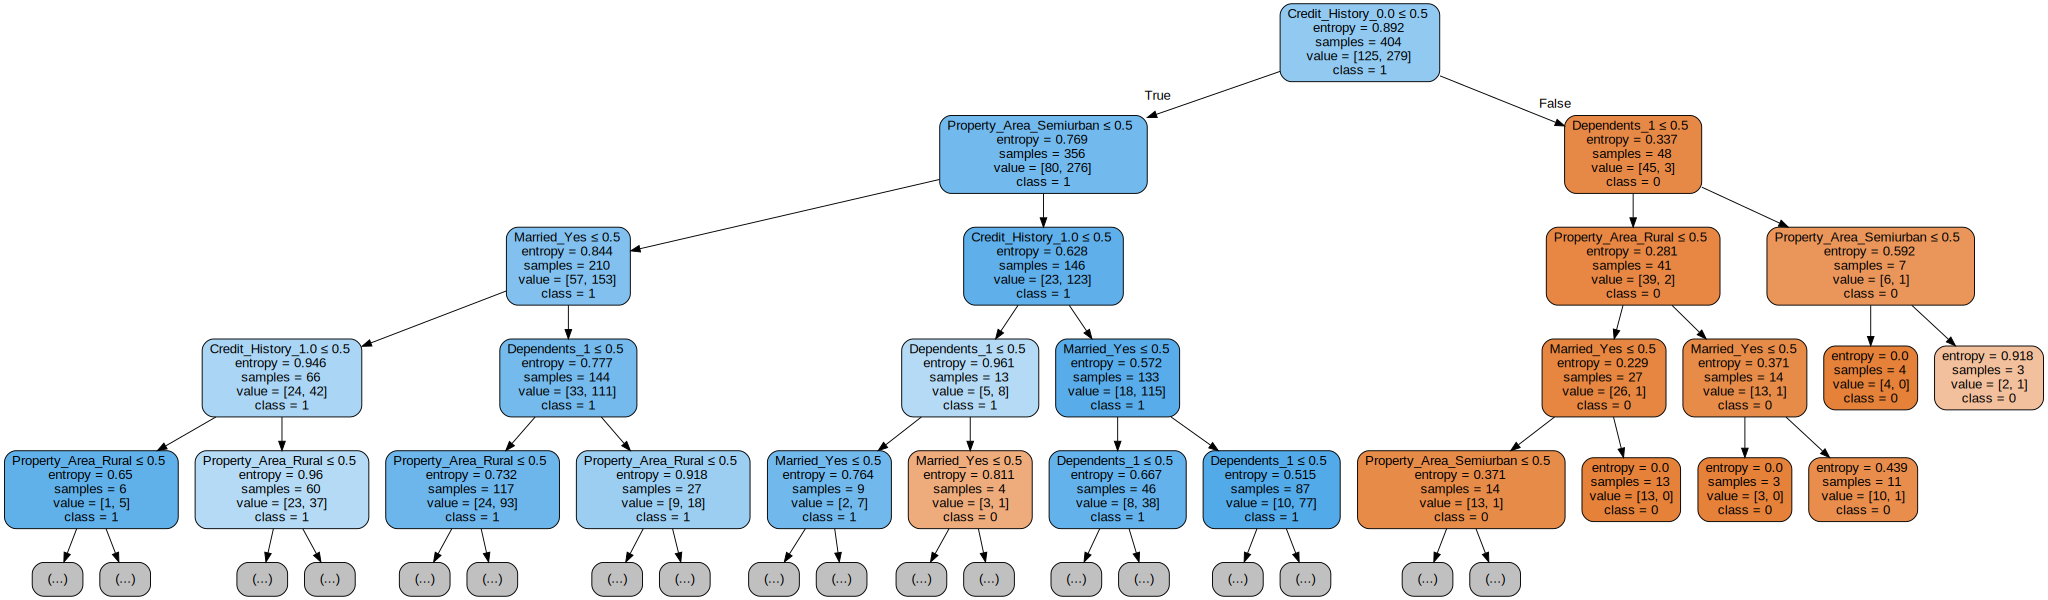

In [64]:
from IPython.display import SVG
SVG(graph.pipe(format='svg'))

# Give the data another chance to solve ^_^

### Dropping is only advised to be used if missing values are few (say 0.01–0.5% of our data). Percent is just a rule of thumb.

In [4]:
loanDf.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
loanDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [6]:
loanDf.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [23]:
data_X.isnull().sum().sort_values(ascending=False)

Credit_History_1.0         0
Gender_Male                0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Gender_Female              0
Married_No                 0
Credit_History_0.0         0
Married_Yes                0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
ApplicantIncome            0
dtype: int64

In [19]:
50/614

0.08143322475570032

## .08 % Missing Percetage

In [25]:
loanDf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [34]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(loanDf[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])
loanDfIm= imp.transform(loanDf[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])

In [36]:
loanDfIm=pd.DataFrame(data=loanDfIm,
             columns=['ApplicantIncome_imp','CoapplicantIncome_imp','LoanAmount_imp','Loan_Amount_Term_imp']) 
loanDf_withoutNan=loanDfIm.join(loanDf)

In [43]:
loanDf["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

### This Method for handling both numarical and missing values ^_^ , pretty H,

In [44]:
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

    
loanDf_imp = DataFrameImputer().fit_transform(loanDf)

In [49]:
loanDf_imp.isnull().sum().sort_values(ascending=False)

Loan_Status          0
Property_Area        0
Credit_History       0
Loan_Amount_Term     0
LoanAmount           0
CoapplicantIncome    0
ApplicantIncome      0
Self_Employed        0
Education            0
Dependents           0
Married              0
Gender               0
Loan_ID              0
dtype: int64

In [192]:
data=loanDf_imp
cat_vars=['Dependents','Gender','Married','Education','Self_Employed','Property_Area','Credit_History']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [193]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg,5)

data=data[to_keep].dropna()
data_X=data.drop(['Loan_Status','Loan_ID'],axis=1)
data_y=data['Loan_Status']

In [194]:
data_X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'total_income', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Credit_History_0.0', 'Credit_History_1.0'],
      dtype='object')

In [195]:
testchi=data_X.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Dependents_0','Dependents_3+','Dependents_2', 'Gender_Female', 'Gender_Male', 'Married_No','Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes','Property_Area_Urban','total_income'],axis=1)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(testchi, data_y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


C:\Users\Essam\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [54]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred)) 

[[ 21  30]
 [  2 132]]
             precision    recall  f1-score   support

          N       0.91      0.41      0.57        51
          Y       0.81      0.99      0.89       134

avg / total       0.84      0.83      0.80       185



In [ ]:
--previous result

[[ 27  23]
 [  6 118]]
             precision    recall  f1-score   support

          N       0.82      0.54      0.65        50
          Y       0.84      0.95      0.89       124

avg / total       0.83      0.83      0.82       174

In [ ]:

بقدر اشوف 99 % من ال Y
بس هبقي عندي غلط بنسبة 19 %
so variance and bias still big,
we will try Ridge Regression ^_^

## Random Forest

In [126]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(testchi,data_y, test_size=0.2, random_state=0)

In [153]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=4,random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print('Train Accuracy of Random Forest: {:.2f}'.format(clf.score(X_train, y_train)))
print('Test Accuracy of Random Forest: {:.2f}'.format(clf.score(X_test, y_test)))

Train Accuracy of Random Forest: 0.80
Test Accuracy of Random Forest: 0.83


In [156]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_train,clf.predict(X_train)))
print(classification_report(y_train,clf.predict(X_train))) 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

[[ 68  91]
 [  5 327]]
             precision    recall  f1-score   support

          N       0.93      0.43      0.59       159
          Y       0.78      0.98      0.87       332

avg / total       0.83      0.80      0.78       491

[[14 19]
 [ 2 88]]
             precision    recall  f1-score   support

          N       0.88      0.42      0.57        33
          Y       0.82      0.98      0.89        90

avg / total       0.84      0.83      0.81       123



In [ ]:
low variance but High Bias

In [151]:
data[data['Loan_Status']=='Y'].count()[0]/data.shape[0]

0.6872964169381107

In [ ]:
##low variance but High Bias
so to solve this issue:
    1- we could add new feature to reduce error.
    2- increse model complexity(drive new vriable)
    3- reduce regularization parameter

In [ ]:
but we first will enhance set of variables because they have much extremes,

In [158]:
loanDf_imp['total_income']=loanDf_imp['ApplicantIncome']+loanDf_imp['CoapplicantIncome']

In [161]:
loanDf_imp['LoanAmount']=np.log(loanDf_imp['LoanAmount'])

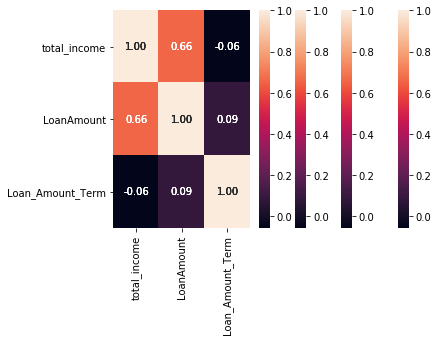

In [175]:
import matplotlib.pyplot as plt
sns.heatmap(loanDf_imp[['total_income','LoanAmount','Loan_Amount_Term']].corr(), annot=True, fmt=".2f")
plt.show()

C:\Users\Essam\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


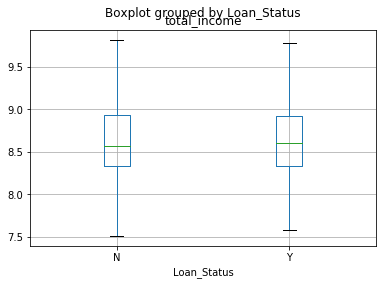

In [182]:
loanDf_imp.boxplot(column='total_income', by='Loan_Status',showfliers=False)
plt.show()

C:\Users\Essam\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


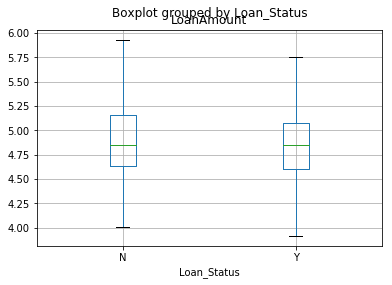

In [186]:
loanDf_imp.boxplot(column='LoanAmount', by='Loan_Status',showfliers=False)
plt.show()

C:\Users\Essam\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


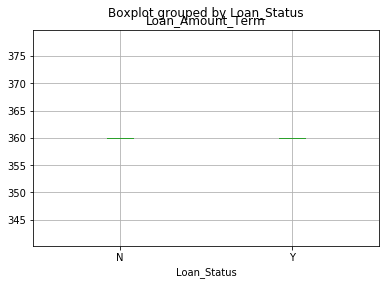

In [187]:
loanDf_imp.boxplot(column='Loan_Amount_Term', by='Loan_Status',showfliers=False)
plt.show()

### Still no significance after log transformation

In [276]:
testchi.columns

Index(['Dependents_1', 'Married_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Credit_History_0.0', 'Credit_History_1.0'],
      dtype='object')

## Cross Validation

In [277]:
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(testchi,data_y, test_size=0.3, random_state=0)

clf = RandomForestClassifier(n_estimators=10, max_depth=4,random_state=0)
scores = cross_val_score(clf,X_train,y_train,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.80 (+/- 0.04)


In [278]:
from sklearn.utils import shuffle

data = shuffle(data)
data_X=data.drop(['Loan_Status','Loan_ID'],axis=1)
data_y=data['Loan_Status']
testchi=data_X.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Dependents_0','Dependents_3+','Dependents_2', 'Gender_Female', 'Gender_Male', 'Married_No','Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes','Property_Area_Urban','total_income'],axis=1)


In [303]:
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(testchi,data_y, test_size=0.3, random_state=0)

clf = RandomForestClassifier(n_estimators=10, max_depth=3,random_state=0)
scores = cross_val_score(clf,X_train,y_train,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.80 (+/- 0.03)


In [304]:
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print('Test Accuracy of Random Forest: {:.2f}'.format(clf.score(X_test, y_test)))

Test Accuracy of Random Forest: 0.84


In [305]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 29  27]
 [  2 127]]
             precision    recall  f1-score   support

          N       0.94      0.52      0.67        56
          Y       0.82      0.98      0.90       129

avg / total       0.86      0.84      0.83       185



### Stratified crossvalidation

In [306]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4)

score=[]
for train_index, test_index in skf.split(X_train,y_train):
    X_tr,X_ts = X_train.values[train_index],X_train.values[test_index]
    y_tr,y_ts= y_train.values[train_index], y_train.values[test_index]
    clf.fit(X_tr,y_tr)
    score.append(clf.score(X_ts,y_ts))
    
np.mean(score)    

0.7949117341640706

In [ ]:
So Finaly: cross validation is 80% and test is 84%
    @ we still does nt handle high bias problem yet.
    so we have two choices :
        1-increase model complexity
        2-reduce model regularization

In [ ]:
'TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area'

In [307]:
data_X.columns
test=data_X[['Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Credit_History_0.0', 'Credit_History_1.0','total_income','LoanAmount']]

In [309]:
X_train, X_test, y_train, y_test = train_test_split(test,data_y, test_size=0.3, random_state=0)

clf = RandomForestClassifier(n_estimators=10, max_depth=3,random_state=0)
scores = cross_val_score(clf,X_train,y_train,cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.79 (+/- 0.03)


In [310]:
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print('Test Accuracy of Random Forest: {:.2f}'.format(clf.score(X_test, y_test)))

Test Accuracy of Random Forest: 0.84


In [311]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 29  27]
 [  2 127]]
             precision    recall  f1-score   support

          N       0.94      0.52      0.67        56
          Y       0.82      0.98      0.90       129

avg / total       0.86      0.84      0.83       185

